In [ ]:
run_project = input("Czy chcesz uruchomić projekt? (tak/nie): ").lower()

if run_project != 'tak':
    raise SystemExit("Projekt nie zostanie uruchomiony.")
print("Projekt uruchomiony.")

## Biblioteki

In [ ]:
!pip install feature_engine
from pathlib import Path
import os
import re
from collections import OrderedDict
from feature_engine.outliers import Winsorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import loguniform, uniform
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    KBinsDiscretizer,
    OneHotEncoder,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
    cross_validate,
)
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    matthews_corrcoef,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    classification_report,
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from IPython.display import display
import joblib
import kagglehub
import pathlib
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 3.9 MB/s eta 0:00:00


## EDA



100%|██████████| 11.2k/11.2k [00:00<00:00, 15.8MB/s]

Extracting files...
Załadowano 390 wierszy i 20 kolumn.



id   chol  stab.glu   hdl  ratio  glyhb    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   4.31  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  diabetes  
0   121.0  medium  118.0   59.0    NaN    NaN   29.0  38.0     720.0         0  
1   218.0   large  112.0   68.0    NaN    NaN   46.0  48.0     360.0         0  
2   256.0   large  190.0   92.0  185.0   92.0   49.0  57.0     180.0         0  
3   119.0   large  110.0   50.0    NaN    NaN   33.0  38.0     480.0         0  
4   183.0  medium  138.0   80.0    NaN    NaN   44.0  41.0     300.0         1

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 401
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        390 non-null    int64  
 1   chol      389 non-null    float64
 2   stab.glu  390 non-null    int64  
 3   hdl       389 non-null    float64
 4   ratio     389 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  390 non-null    object 
 7   age       390 non-null    int64  
 8   gender    390 non-null    object 
 9   height    385 non-null    float64
 10  weight    389 non-null    float64
 11  frame     379 non-null    object 
 12  bp.1s     385 non-null    float64
 13  bp.1d     385 non-null    float64
 14  bp.2s     138 non-null    float64
 15  bp.2d     138 non-null    float64
 16  waist     388 non-null    float64
 17  hip       388 non-null    float64
 18  time.ppn  387 non-null    float64
 19  diabetes  390 non-null    int64  
dtypes: float64(13), int64(4), object(3)
m

count          mean           std      min      25%       50%  \
id        390.0  16003.761538  11828.808130  1000.00  4792.25  15769.50   
chol      389.0    207.275064     44.714950    78.00   179.00    203.00   
stab.glu  390.0    107.338462     53.798188    48.00    81.00     90.00   
hdl       389.0     50.267352     17.301317    12.00    38.00     46.00   
ratio     389.0      4.526478      1.738480     1.50     3.20      4.20   
glyhb     390.0      5.589769      2.242595     2.68     4.38      4.84   
age       390.0     46.774359     16.435911    19.00    34.00     44.50   
height    385.0     65.984416      3.925712    52.00    63.00     66.00   
weight    389.0    177.349614     40.443560    99.00   150.00    173.00   
bp.1s     385.0    137.148052     22.997427    90.00   121.00    136.00   
bp.1d     385.0     83.285714     13.582366    48.00    75.00     82.00   
bp.2s     138.0    152.840580     21.709847   110.00   138.25    150.00   
bp.2d     138.0     92.731884     11.576808    60.00    84.00     92.00   
waist     388.0     37.896907      5.762724    26.00    33.00     37.00   
hip       388.0     43.033505      5.649213    30.00    39.00     42.00   
time.ppn  387.0    336.124031    308.904281     5.00    90.00    240.00   
diabetes  390.0      0.166667      0.373157     0.00     0.00      0.00   

               75%           max  
id        20334.25  41752.000000  
chol        229.00    443.000000  
stab.glu    107.75    385.000000  
hdl          59.00    120.000000  
ratio         5.40     19.299999  
glyhb         5.60     16.110001  
age          60.00     92.000000  
height       69.00     76.000000  
weight      200.00    325.000000  
bp.1s       148.00    250.000000  
bp.1d        90.00    124.000000  
bp.2s       161.75    238.000000  
bp.2d       100.00    124.000000  
waist        41.00     56.000000  
hip          46.00     64.000000  
time.ppn    480.00   1560.000000  
diabetes      0.00      1.000000


Rozkład klas:


diabetes
Brak cukrzycy    325
Cukrzyca          65
Name: count, dtype: int64

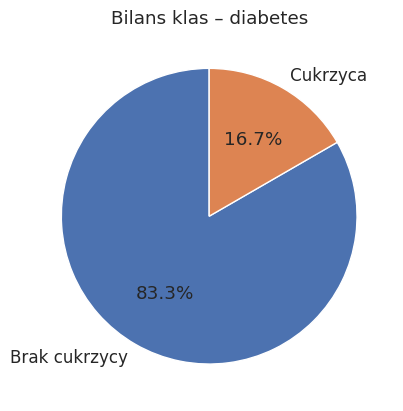


Braki danych w kolumnach:


Liczba braków
id                    0
chol                  1
stab.glu              0
hdl                   1
ratio                 1
glyhb                 0
location              0
age                   0
gender                0
height                5
weight                1
frame                11
bp.1s                 5
bp.1d                 5
bp.2s               252
bp.2d               252
waist                 2
hip                   2
time.ppn              3
diabetes              0

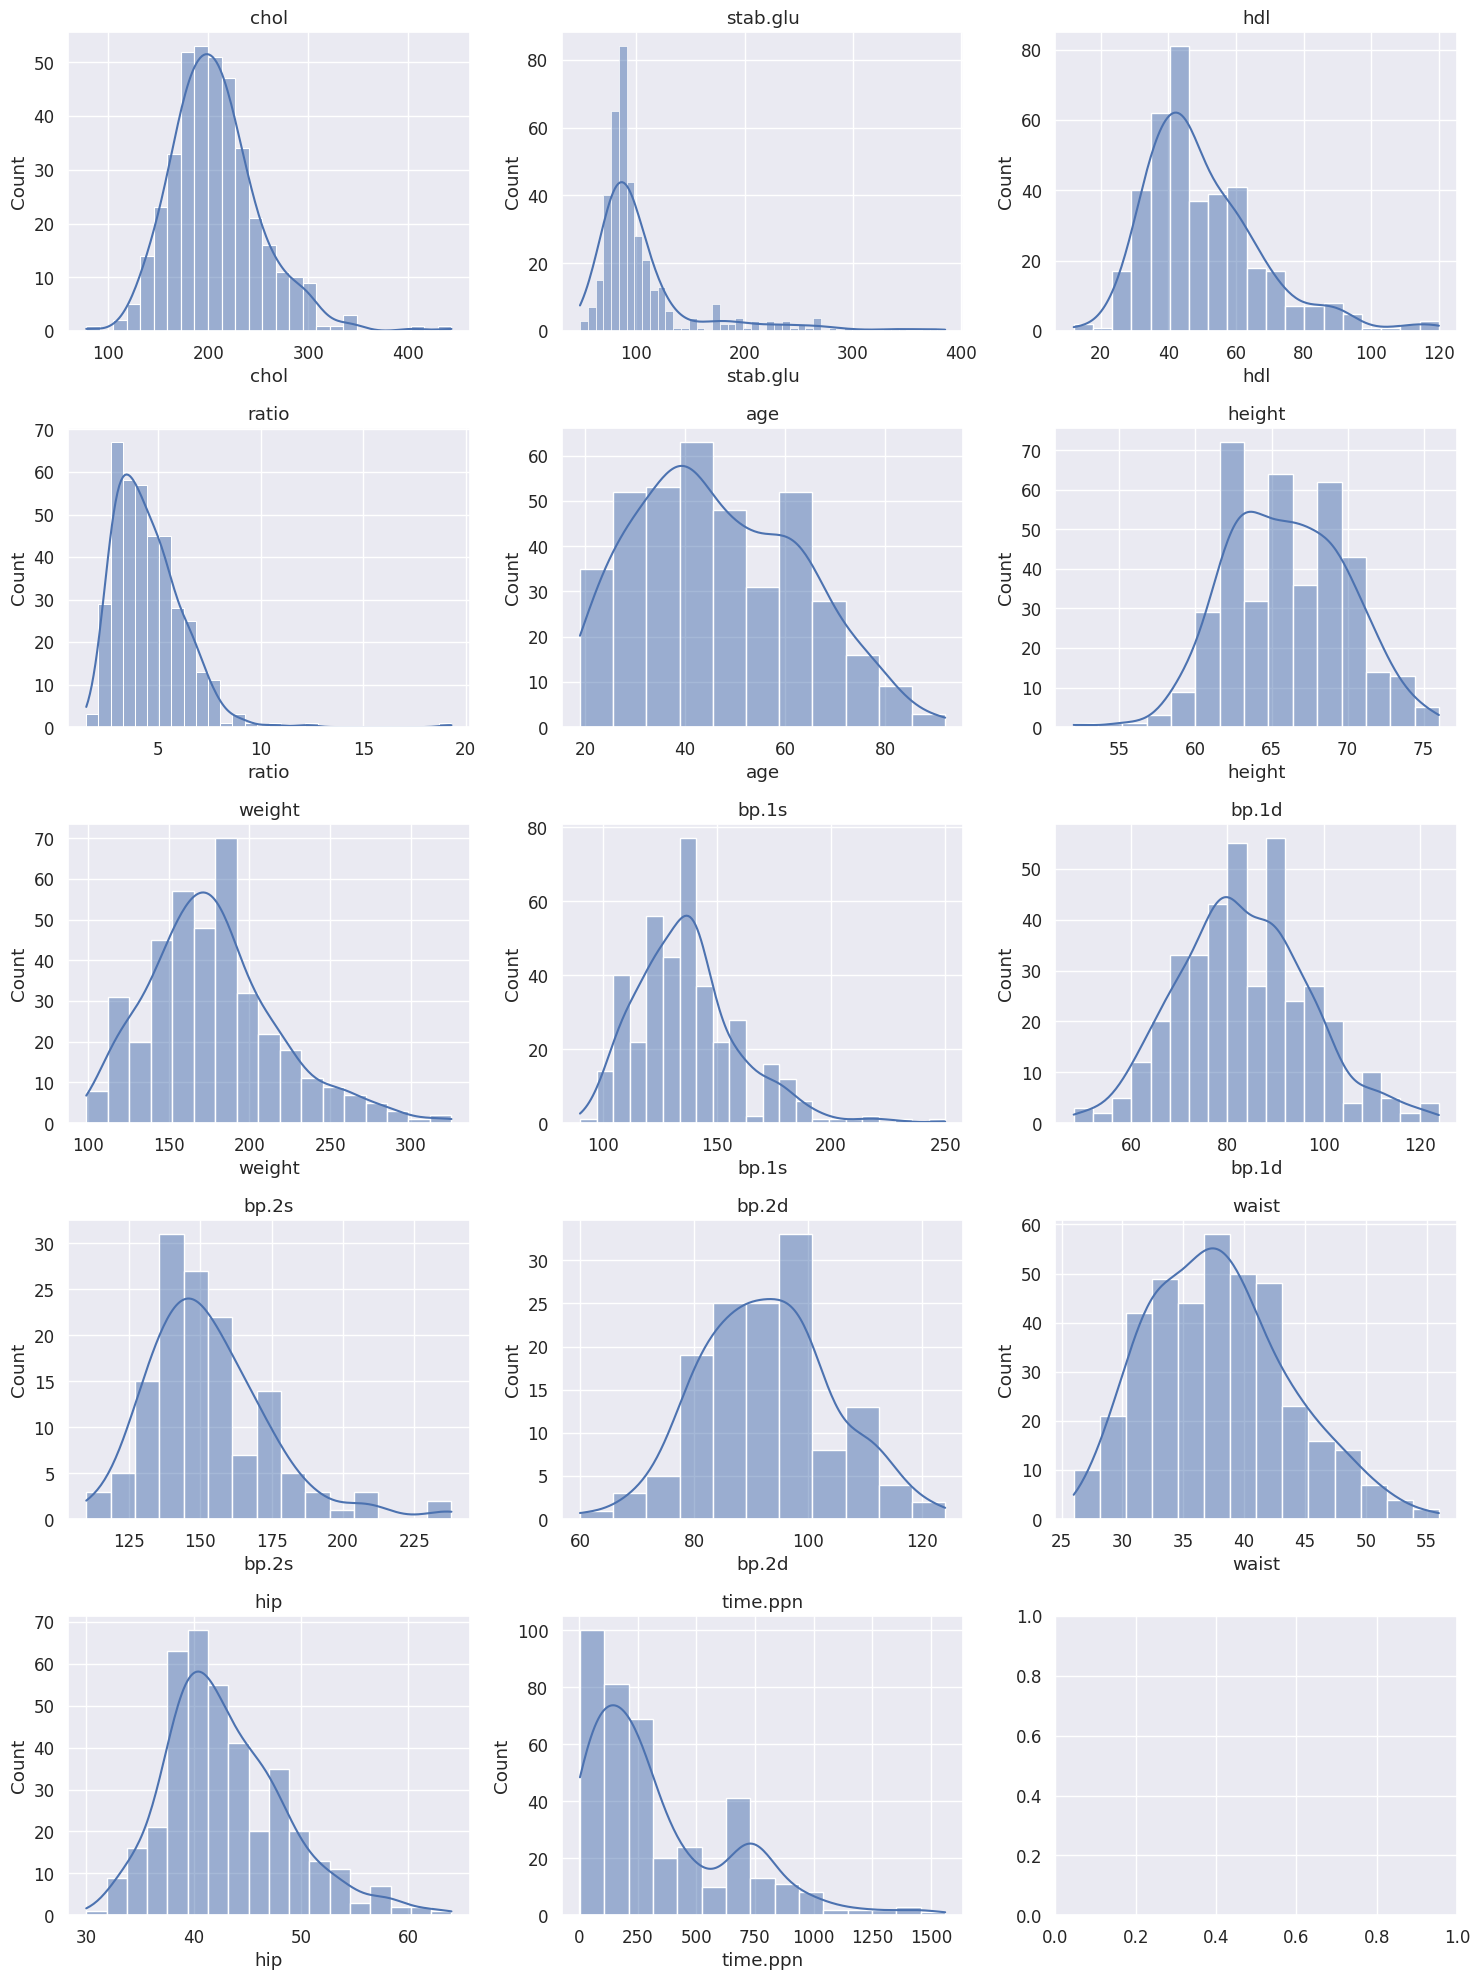

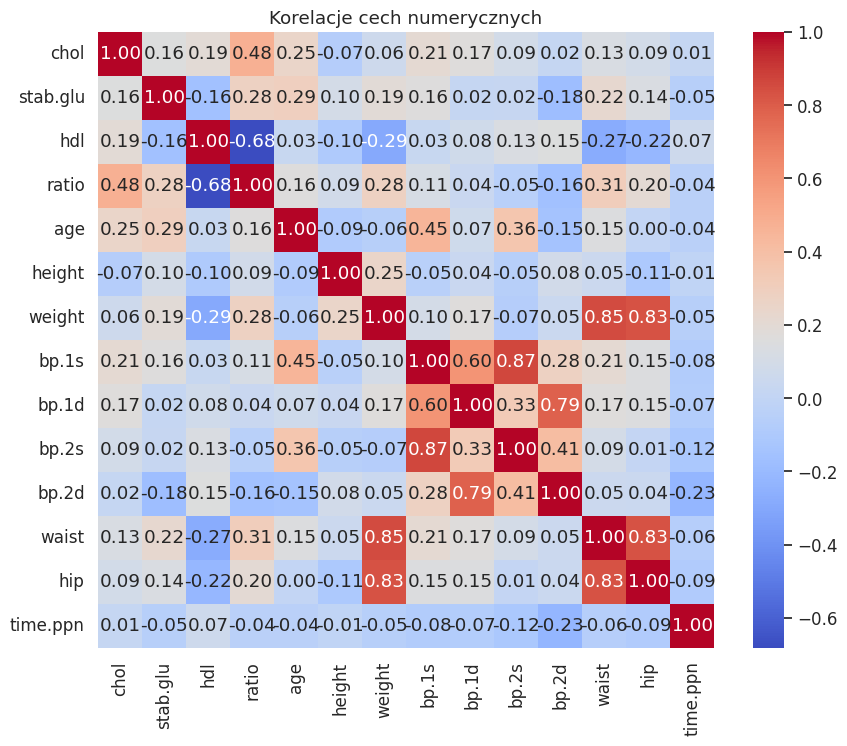

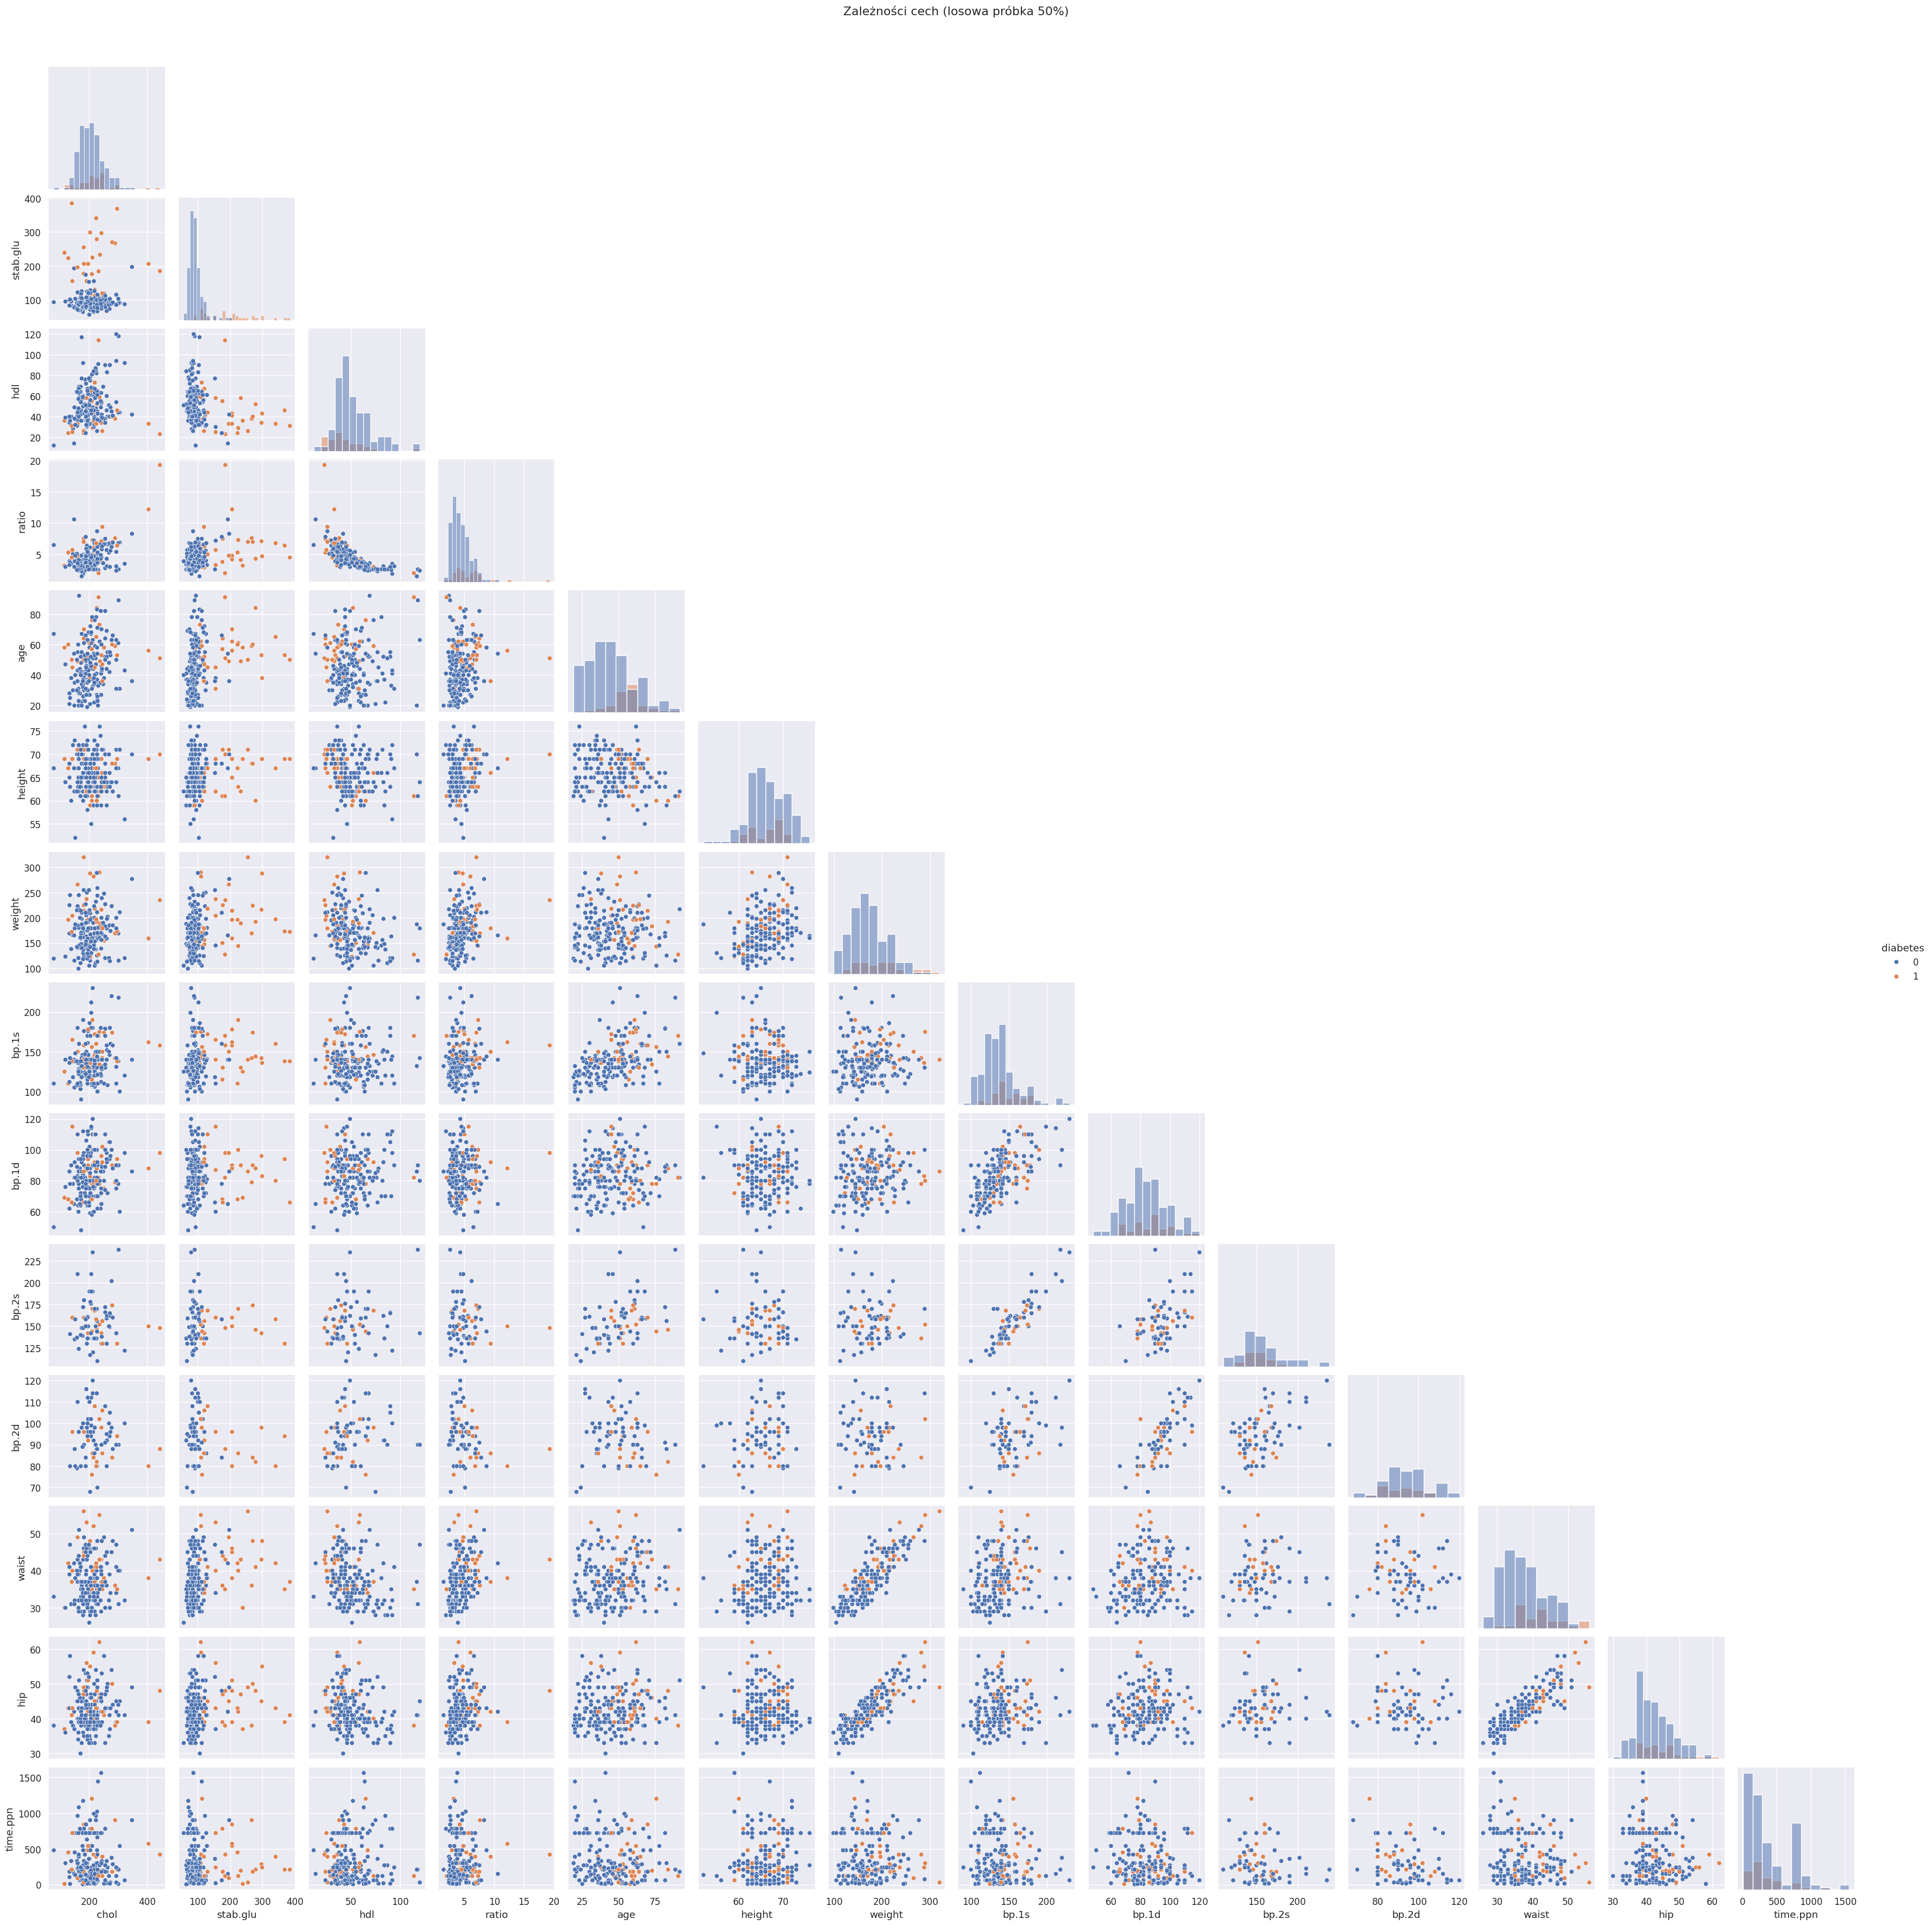

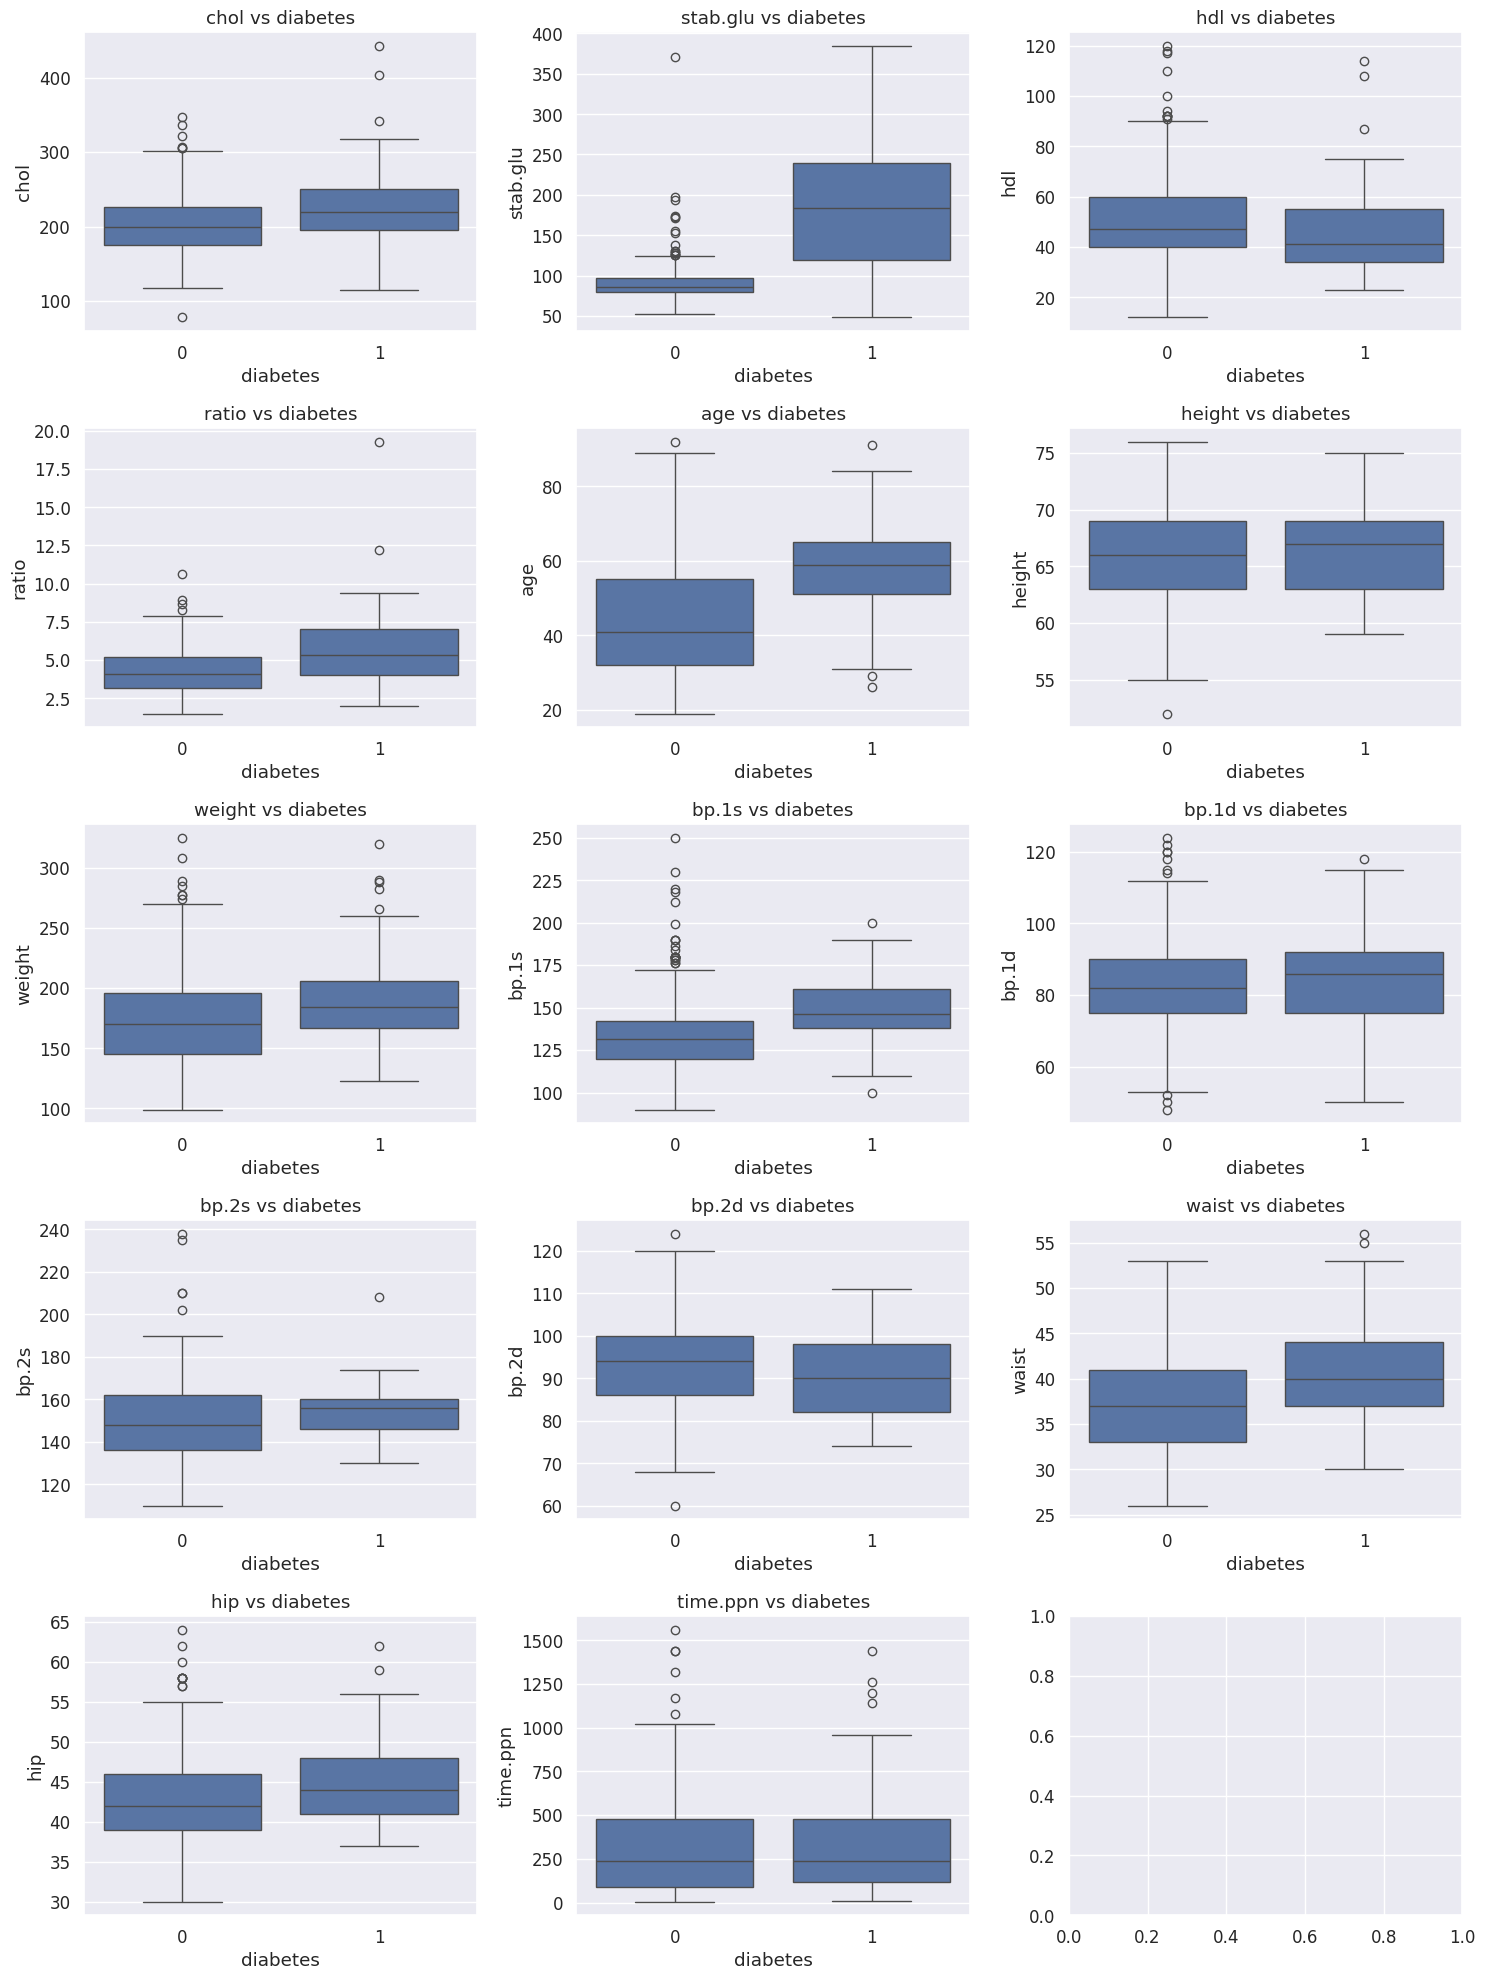

In [ ]:
plt.style.use("default")  # ustawienie stylu wykresów
sns.set(font_scale=1.1)  # skalowanie czcionki
pd.set_option("display.max_columns", None)  # wyświetlanie wszystkich kolumn

path = kagglehub.dataset_download("imtkaggleteam/diabetes")  # pobranie zbioru danych
path = pathlib.Path(path)  # konwersja ścieżki
csv_file = next(path.glob("*.csv"))  # wyszukanie pliku CSV
df = pd.read_csv(csv_file.as_posix())  # odczyt pliku CSV

df = df.dropna(subset=["glyhb"])  # usunięcie braków w kolumnie glyhb
df["diabetes"] = (df["glyhb"] >= 6.5).astype(int)  # utworzenie etykiety cukrzycy

target = "diabetes"  # nazwa zmiennej celu
feature_cols = df.columns.drop(["id", "glyhb", target])  # wybór cech

print(f"Załadowano {df.shape[0]} wierszy i {df.shape[1]} kolumn.\n")  # podsumowanie danych
display(df.head())  # wgląd w dane
df.info()  # informacje o strukturze DataFrame
print("\nStatystyki opisowe:")  # nagłówek statystyk
display(df.describe().T)  # statystyki opisowe

class_counts = df[target].value_counts().rename(index={0: "Brak cukrzycy", 1: "Cukrzyca"})  # zliczenie klas
print("\nRozkład klas:")  # nagłówek rozkładu klas
display(class_counts)  # wyświetlenie rozkładu klas

fig, ax = plt.subplots()  # inicjalizacja wykresu
ax.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", startangle=90)  # wykres kołowy klas
ax.set_title(f"Bilans klas – {target}")  # tytuł wykresu
plt.show()  # wyświetlenie wykresu

missing_summary = df.isna().sum().to_frame("Liczba braków")  # podsumowanie braków danych
print("\nBraki danych w kolumnach:")  # nagłówek braków
display(missing_summary)  # wyświetlenie braków

num_cols = df[feature_cols].select_dtypes(include="number").columns  # cechy numeryczne
n = len(num_cols)  # liczba cech numerycznych
cols = 3  # liczba kolumn wykresów
rows = (n + cols - 1) // cols  # liczba wierszy wykresów
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  # inicjalizacja siatki wykresów
axes = axes.flatten()  # spłaszczenie osi
for ax, col in zip(axes, num_cols):  # iteracja po cechach
    sns.histplot(df[col], kde=True, ax=ax)  # histogram z estymacją gęstości
    ax.set_title(col)  # tytuł pod wykresem
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie histogramów

corr = df[num_cols].corr()  # macierz korelacji cech numerycznych
plt.figure(figsize=(10, 8))  # rozmiar mapy cieplnej
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)  # mapa cieplna korelacji
plt.title("Korelacje cech numerycznych")  # tytuł wykresu
plt.show()  # wyświetlenie mapy cieplnej

sns.pairplot(df.sample(frac=0.5, random_state=42), hue=target, vars=num_cols, diag_kind="hist", corner=True)  # analiza par cech
plt.suptitle("Zależności cech (losowa próbka 50%)", y=1.02)  # tytuł zbiorczy
plt.show()  # wyświetlenie pairplot

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  # inicjalizacja siatki wykresów pudełkowych
axes = axes.flatten()  # spłaszczenie osi
for ax, col in zip(axes, num_cols):  # iteracja po cechach
    sns.boxplot(x=target, y=col, data=df, ax=ax)  # wykres pudełkowy względem klasy
    ax.set_title(f"{col} vs {target}")  # tytuł pod wykresem
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresów pudełkowych


## Preprocessing

In [ ]:
target = "diabetes"  # etykieta
feature_cols = df.columns.drop(["id", "glyhb", target])  # cechy

X = df[feature_cols].copy()  # dane wejściowe
y = df[target].copy()  # etykiety

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,  # procent testu
    stratify=y,  # proporcje klas
    random_state=42  # ziarno losowości
)

class Winsorizer(BaseEstimator, TransformerMixin):  # klasa przycinająca
    def __init__(self, lower_q=0.01, upper_q=0.99):  # kwantyle
        self.lower_q = lower_q
        self.upper_q = upper_q
    def fit(self, X, y=None):  # dopasowanie
        arr = X if isinstance(X, np.ndarray) else X.to_numpy()  # konwersja
        q_low  = np.nanquantile(arr, self.lower_q, axis=0)  # dolny kwantyl
        q_high = np.nanquantile(arr, self.upper_q, axis=0)  # górny kwantyl
        self.bounds_ = np.vstack([q_low, q_high]).T  # progi
        return self
    def transform(self, X):  # transformacja
        arr = X if isinstance(X, np.ndarray) else X.to_numpy()  # konwersja
        for i in range(arr.shape[1]):  # iteracja cech
            lo, hi = self.bounds_[i]  # zakres
            arr[:, i] = np.clip(arr[:, i], lo, hi)  # przycięcie
        return arr
    def get_feature_names_out(self, input_features=None):  # nazwy cech
        return np.asarray(
            input_features
            if input_features is not None
            else self.feature_names_in_,
            dtype=object,
        )

numeric_cols     = df[feature_cols].select_dtypes(include="number").columns.tolist()  # cechy numeryczne
categorical_cols = df[feature_cols].select_dtypes(exclude="number").columns.tolist()  # cechy kategoryczne

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # imputacja medianą
    ("winsor",  Winsorizer(0.01, 0.99)),  # przycinanie odstępstw
    ("scaler",  StandardScaler()),  # skalowanie
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # imputacja wartości najczęstszych
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),  # kodowanie one-hot
])

preprocess_ct = ColumnTransformer([
    ("num", num_pipe, numeric_cols),  # przetwarzanie numerycznych
    ("cat", cat_pipe, categorical_cols),  # przetwarzanie kategorycznych
], remainder="drop")  # usunięcie pozostałych

prep_pipeline = ImbPipeline([
    ("preprocess",  preprocess_ct),  # etap preprocessingu
    ("undersample", RandomUnderSampler(random_state=42)),  # undersampling
])

X_train_proc, y_train_bal = prep_pipeline.fit_resample(X_train, y_train)  # dopasowanie i balans
X_test_proc  = prep_pipeline.named_steps["preprocess"].transform(X_test)  # transformacja testu

print(f"Po preprocessingu: X_train={X_train_proc.shape}, X_test={X_test_proc.shape}")  # rozmiary
print("Rozkład klas po undersamplingu w train:", np.bincount(y_train_bal))  # rozkład klas


Po preprocessingu: X_train=(104, 21), X_test=(78, 21)
Rozkład klas po undersamplingu w train: [52 52]


## EDA po preprocessingu

Załadowano 104 wierszy i 21 kolumn.



num__chol  num__stab.glu  num__hdl  num__ratio  num__age  num__height  \
0  -0.990909      -0.695080  0.769953   -1.270768 -1.584036     1.634114   
1   3.000278      -0.426269  0.711085    0.597669 -0.660671     1.634114   
2  -0.105790      -0.503072  0.299011   -0.536739  1.124500    -1.019939   
3  -1.433468      -0.445470  0.240143   -1.204038 -0.968460    -0.223723   
4  -0.012620      -0.330266 -0.701742    0.597669 -0.475998     0.837898   

   num__weight  num__bp.1s  num__bp.1d  num__bp.2s  num__bp.2d  num__waist  \
0    -0.810589   -1.306978   -0.443596   -0.089449   -0.011123   -1.563206   
1     0.311098   -0.585466    0.016211   -0.089449   -0.011123   -0.321989   
2    -0.249745    2.390773    2.621786   -0.089449   -0.011123    1.096545   
3    -0.300731   -1.577545   -2.112697   -0.089449   -0.011123   -0.853939   
4    -0.249745    0.045858    0.476018   -0.089449   -0.011123   -0.321989   

   num__hip  num__time.ppn  cat__location_Buckingham  cat__location_Louisa  \
0 -1.309046       2.315063                       1.0                   0.0   
1  0.174696      -0.335082                       0.0                   1.0   
2  0.731100      -0.713674                       1.0                   0.0   
3 -0.196239       1.179286                       1.0                   0.0   
4  0.731100      -0.808322                       1.0                   0.0   

   cat__gender_female  cat__gender_male  cat__frame_large  cat__frame_medium  \
0                 0.0               1.0               0.0                0.0   
1                 0.0               1.0               0.0                1.0   
2                 1.0               0.0               0.0                1.0   
3                 1.0               0.0               0.0                0.0   
4                 1.0               0.0               0.0                1.0   

   cat__frame_small  
0               1.0  
1               0.0  
2               0.0  
3               1.0  
4               0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   num__chol                 104 non-null    float64
 1   num__stab.glu             104 non-null    float64
 2   num__hdl                  104 non-null    float64
 3   num__ratio                104 non-null    float64
 4   num__age                  104 non-null    float64
 5   num__height               104 non-null    float64
 6   num__weight               104 non-null    float64
 7   num__bp.1s                104 non-null    float64
 8   num__bp.1d                104 non-null    float64
 9   num__bp.2s                104 non-null    float64
 10  num__bp.2d                104 non-null    float64
 11  num__waist                104 non-null    float64
 12  num__hip                  104 non-null    float64
 13  num__time.ppn             104 non-null    float64
 14  cat__locat

count      mean       std       min       25%  \
num__chol                 104.0  0.176792  1.168368 -1.953825 -0.606581   
num__stab.glu             104.0  0.651075  1.464412 -0.980980 -0.445470   
num__hdl                  104.0  0.021721  1.172516 -1.525890 -0.760609   
num__ratio                104.0  0.161717  1.173826 -1.597077 -0.820341   
num__age                  104.0  0.413433  0.990948 -1.584036 -0.352883   
num__height               104.0 -0.009357  0.958772 -2.081560 -0.754534   
num__weight               104.0  0.000445  0.949424 -1.600869 -0.657632   
num__bp.1s                104.0  0.260213  1.101093 -1.667734 -0.427635   
num__bp.1d                104.0  0.044050  1.057910 -2.112697 -0.673500   
num__bp.2s                104.0  0.244001  1.045769 -1.738568 -0.089449   
num__bp.2d                104.0 -0.047809  1.054323 -2.804478 -0.011123   
num__waist                104.0  0.083231  1.027361 -1.740523 -0.853939   
num__hip                  104.0  0.029853  0.947570 -1.865449 -0.567175   
num__time.ppn             104.0  0.076934  1.121844 -1.060717 -0.808322   
cat__location_Buckingham  104.0  0.519231  0.502050  0.000000  0.000000   
cat__location_Louisa      104.0  0.480769  0.502050  0.000000  0.000000   
cat__gender_female        104.0  0.644231  0.481064  0.000000  0.000000   
cat__gender_male          104.0  0.355769  0.481064  0.000000  0.000000   
cat__frame_large          104.0  0.298077  0.459629  0.000000  0.000000   
cat__frame_medium         104.0  0.442308  0.499066  0.000000  0.000000   
cat__frame_small          104.0  0.259615  0.440547  0.000000  0.000000   

                               50%       75%       max  
num__chol                 0.057258  0.988962  3.000278  
num__stab.glu             0.024949  1.503408  4.465895  
num__hdl                 -0.230799  0.490331  3.746307  
num__ratio               -0.136360  1.081460  2.918533  
num__age                  0.447366  1.139890  2.287324  
num__height               0.041682  0.837898  2.164924  
num__weight              -0.109534  0.534161  2.883077  
num__bp.1s                0.136047  0.959022  3.323327  
num__bp.1d               -0.137058  0.514336  2.758195  
num__bp.2s               -0.089449 -0.078878  5.008441  
num__bp.2d               -0.011123 -0.011123  3.403343  
num__waist                0.032644  0.741912  2.672891  
num__hip                 -0.010771  0.731100  3.101377  
num__time.ppn            -0.335082  0.895342  3.409194  
cat__location_Buckingham  1.000000  1.000000  1.000000  
cat__location_Louisa      0.000000  1.000000  1.000000  
cat__gender_female        1.000000  1.000000  1.000000  
cat__gender_male          0.000000  1.000000  1.000000  
cat__frame_large          0.000000  1.000000  1.000000  
cat__frame_medium         0.000000  1.000000  1.000000  
cat__frame_small          0.000000  1.000000  1.000000


Rozkład klas:


diabetes
Brak cukrzycy    52
Cukrzyca         52
Name: count, dtype: int64

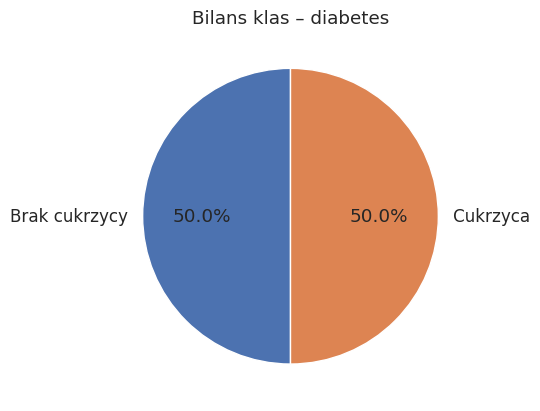


Braki danych w kolumnach:


Liczba braków
num__chol                             0
num__stab.glu                         0
num__hdl                              0
num__ratio                            0
num__age                              0
num__height                           0
num__weight                           0
num__bp.1s                            0
num__bp.1d                            0
num__bp.2s                            0
num__bp.2d                            0
num__waist                            0
num__hip                              0
num__time.ppn                         0
cat__location_Buckingham              0
cat__location_Louisa                  0
cat__gender_female                    0
cat__gender_male                      0
cat__frame_large                      0
cat__frame_medium                     0
cat__frame_small                      0

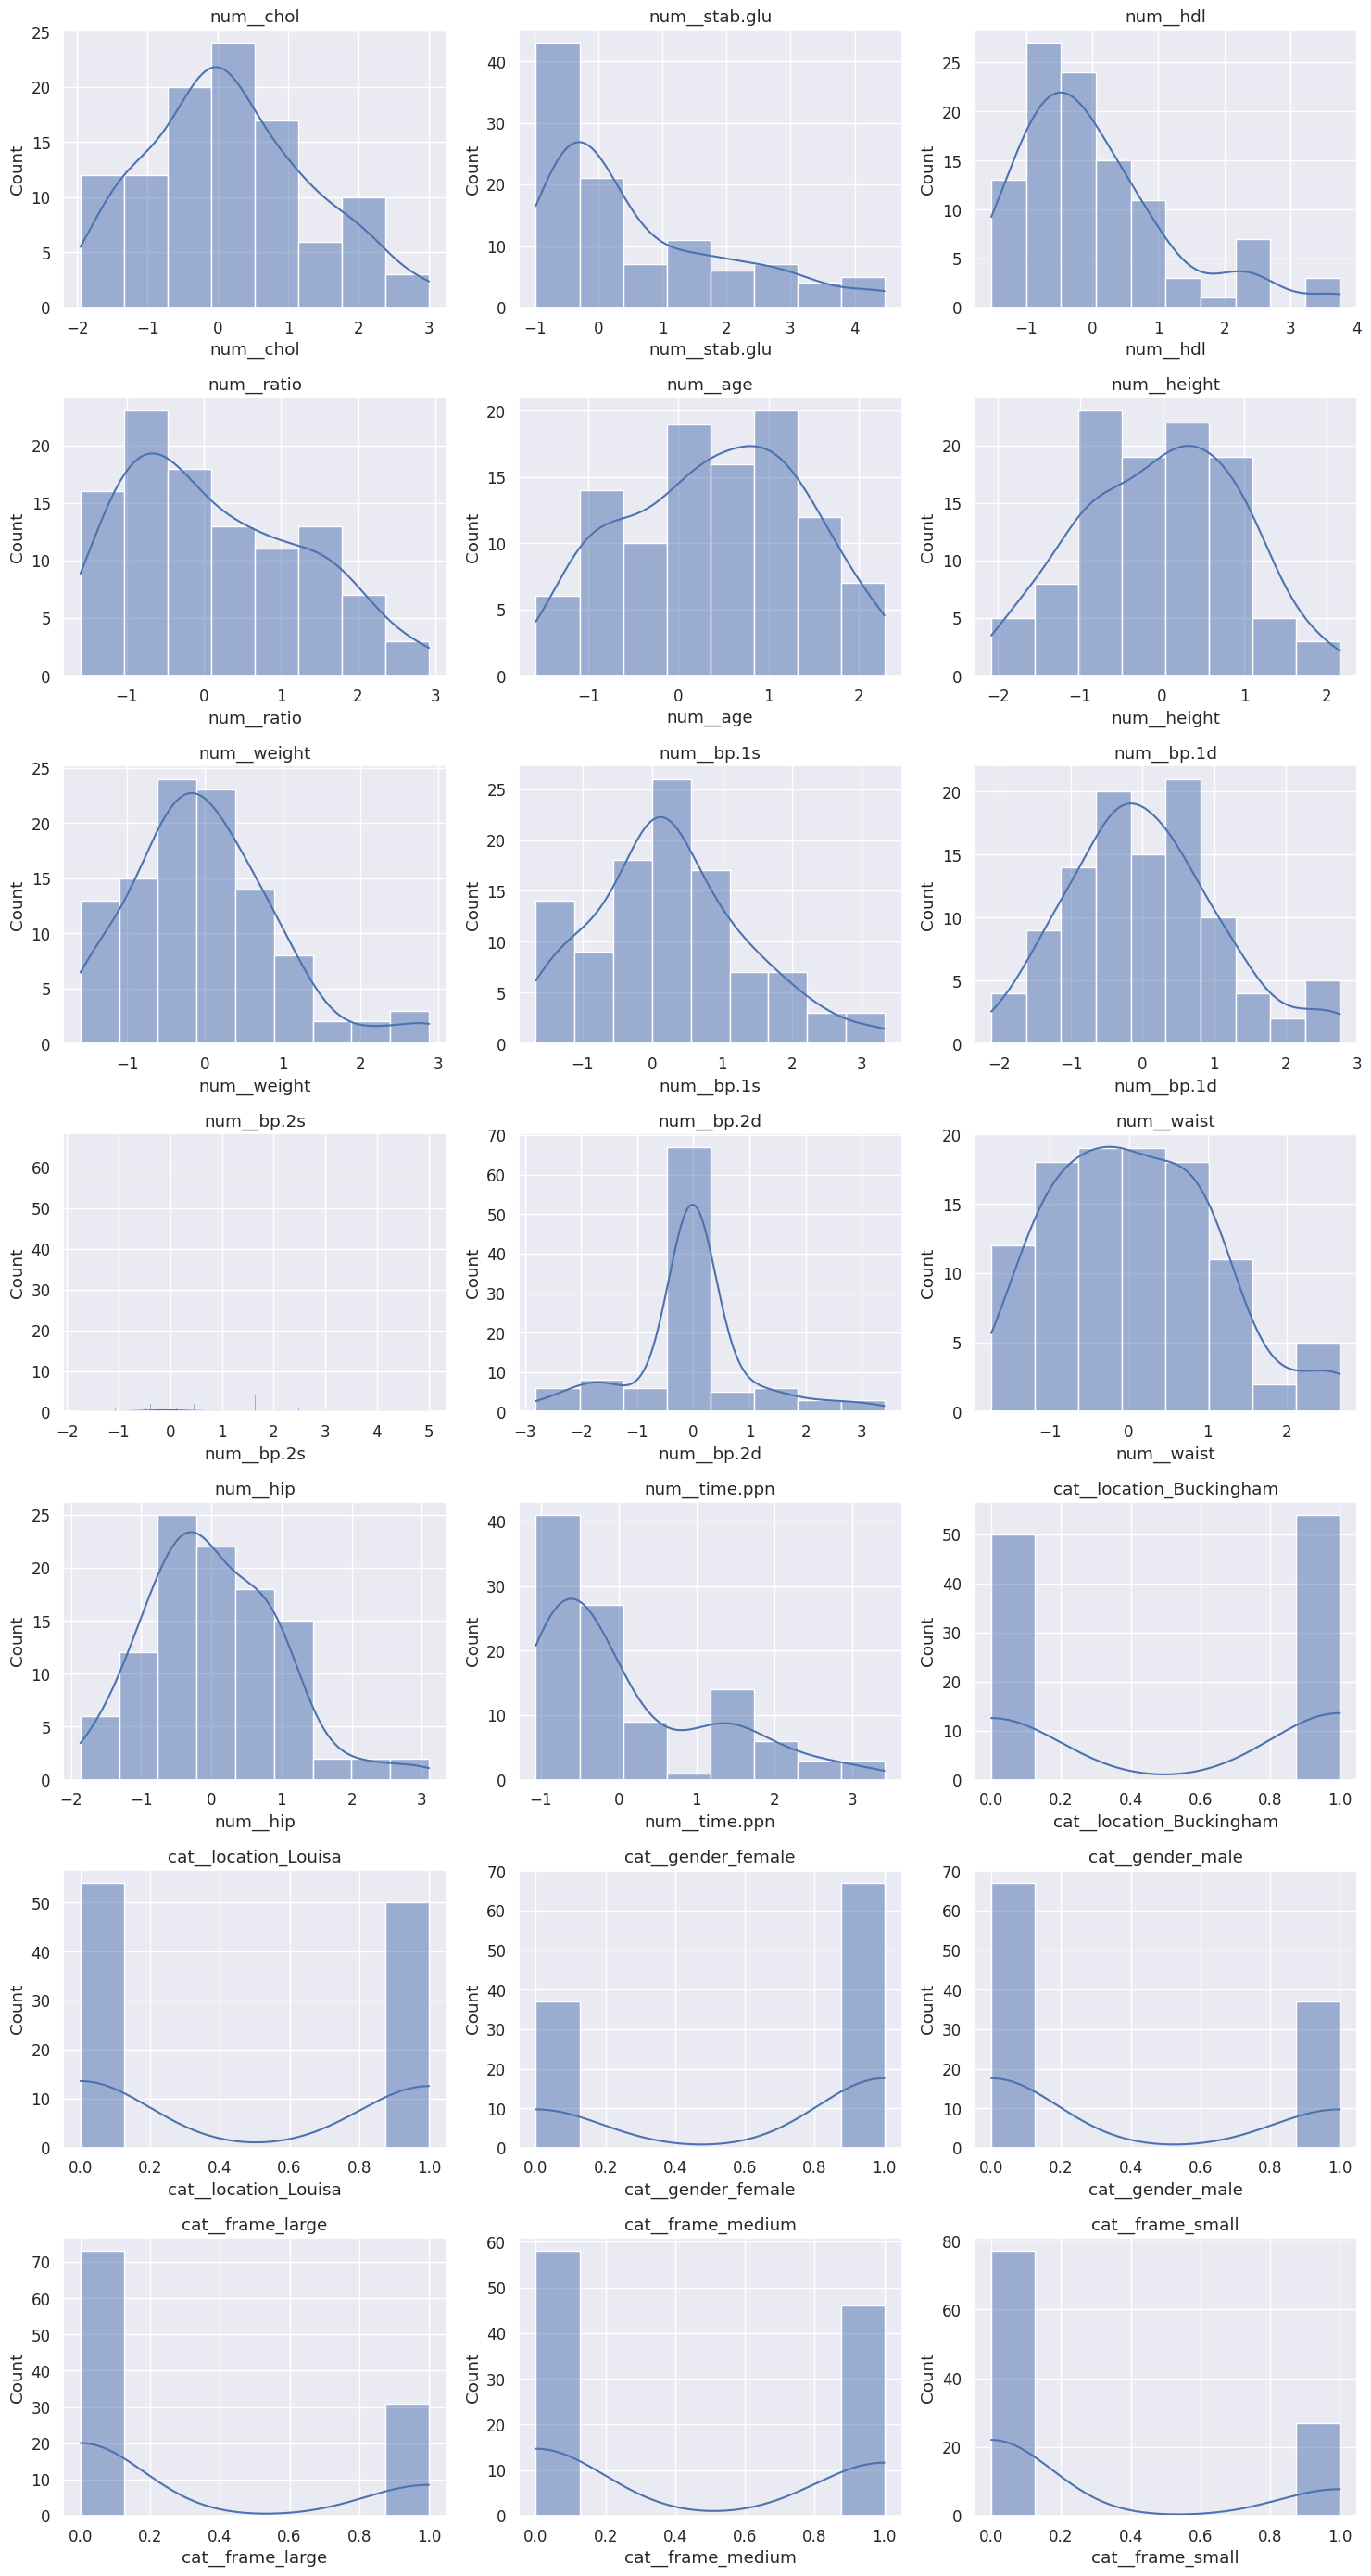

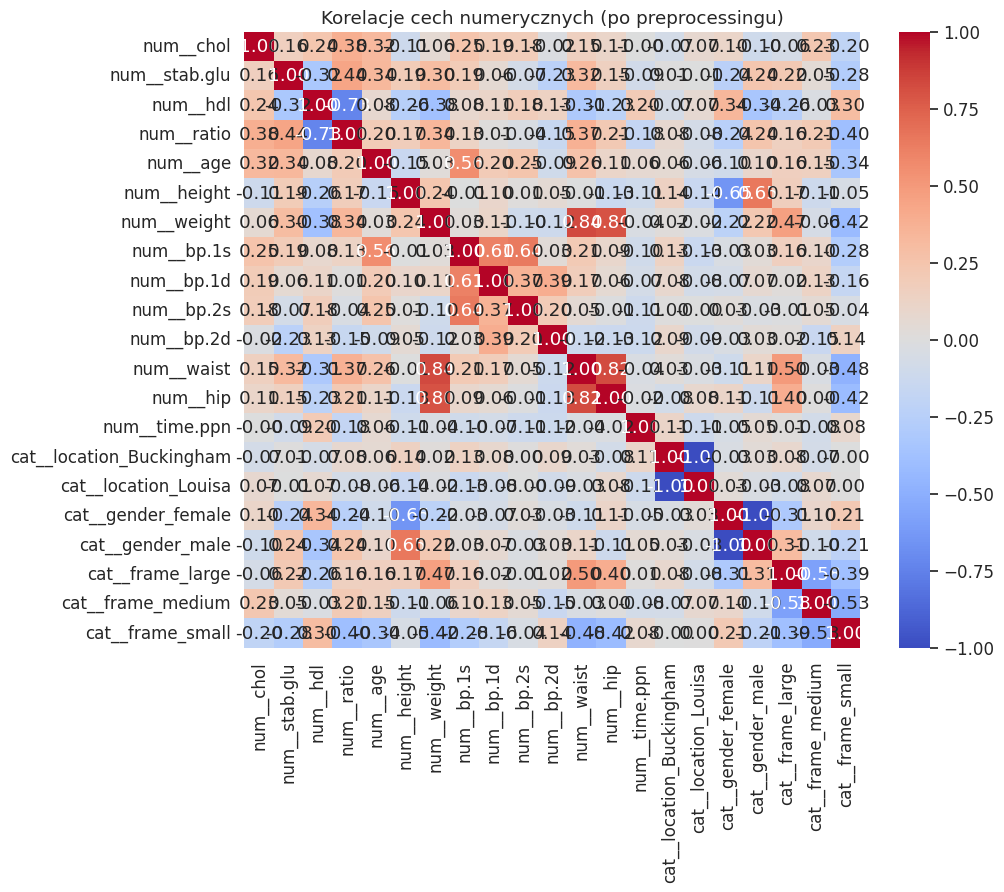

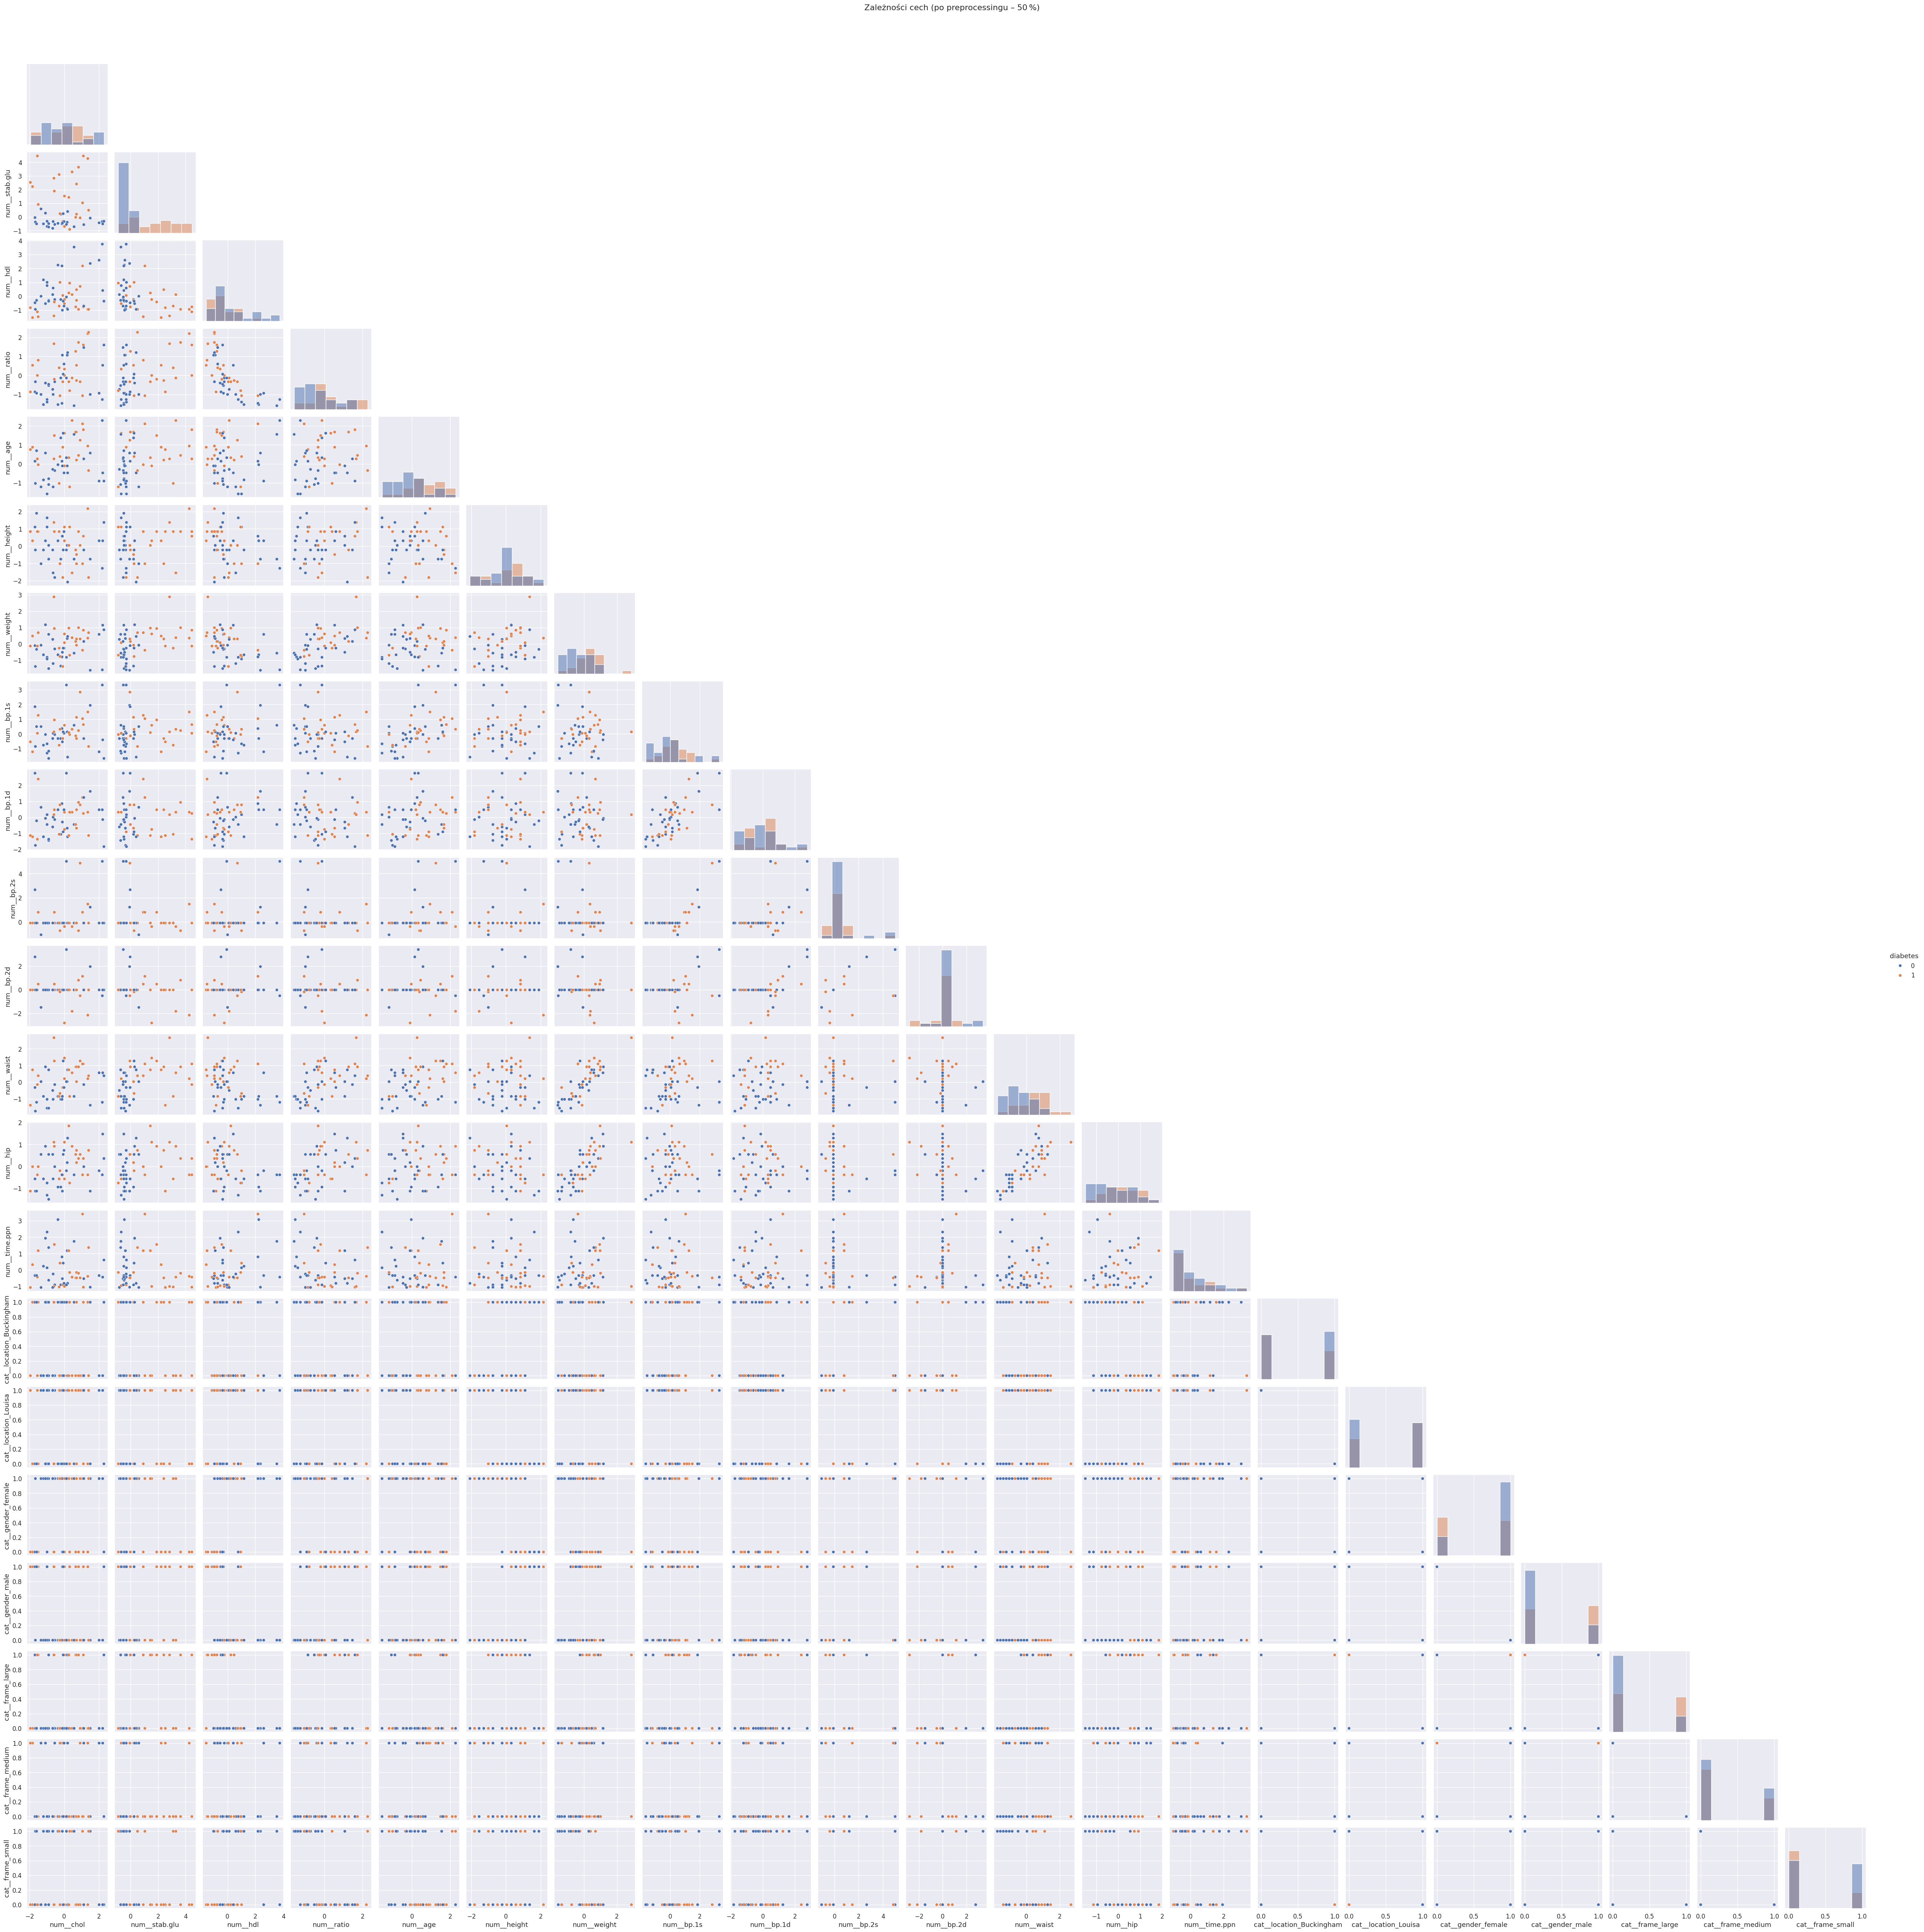

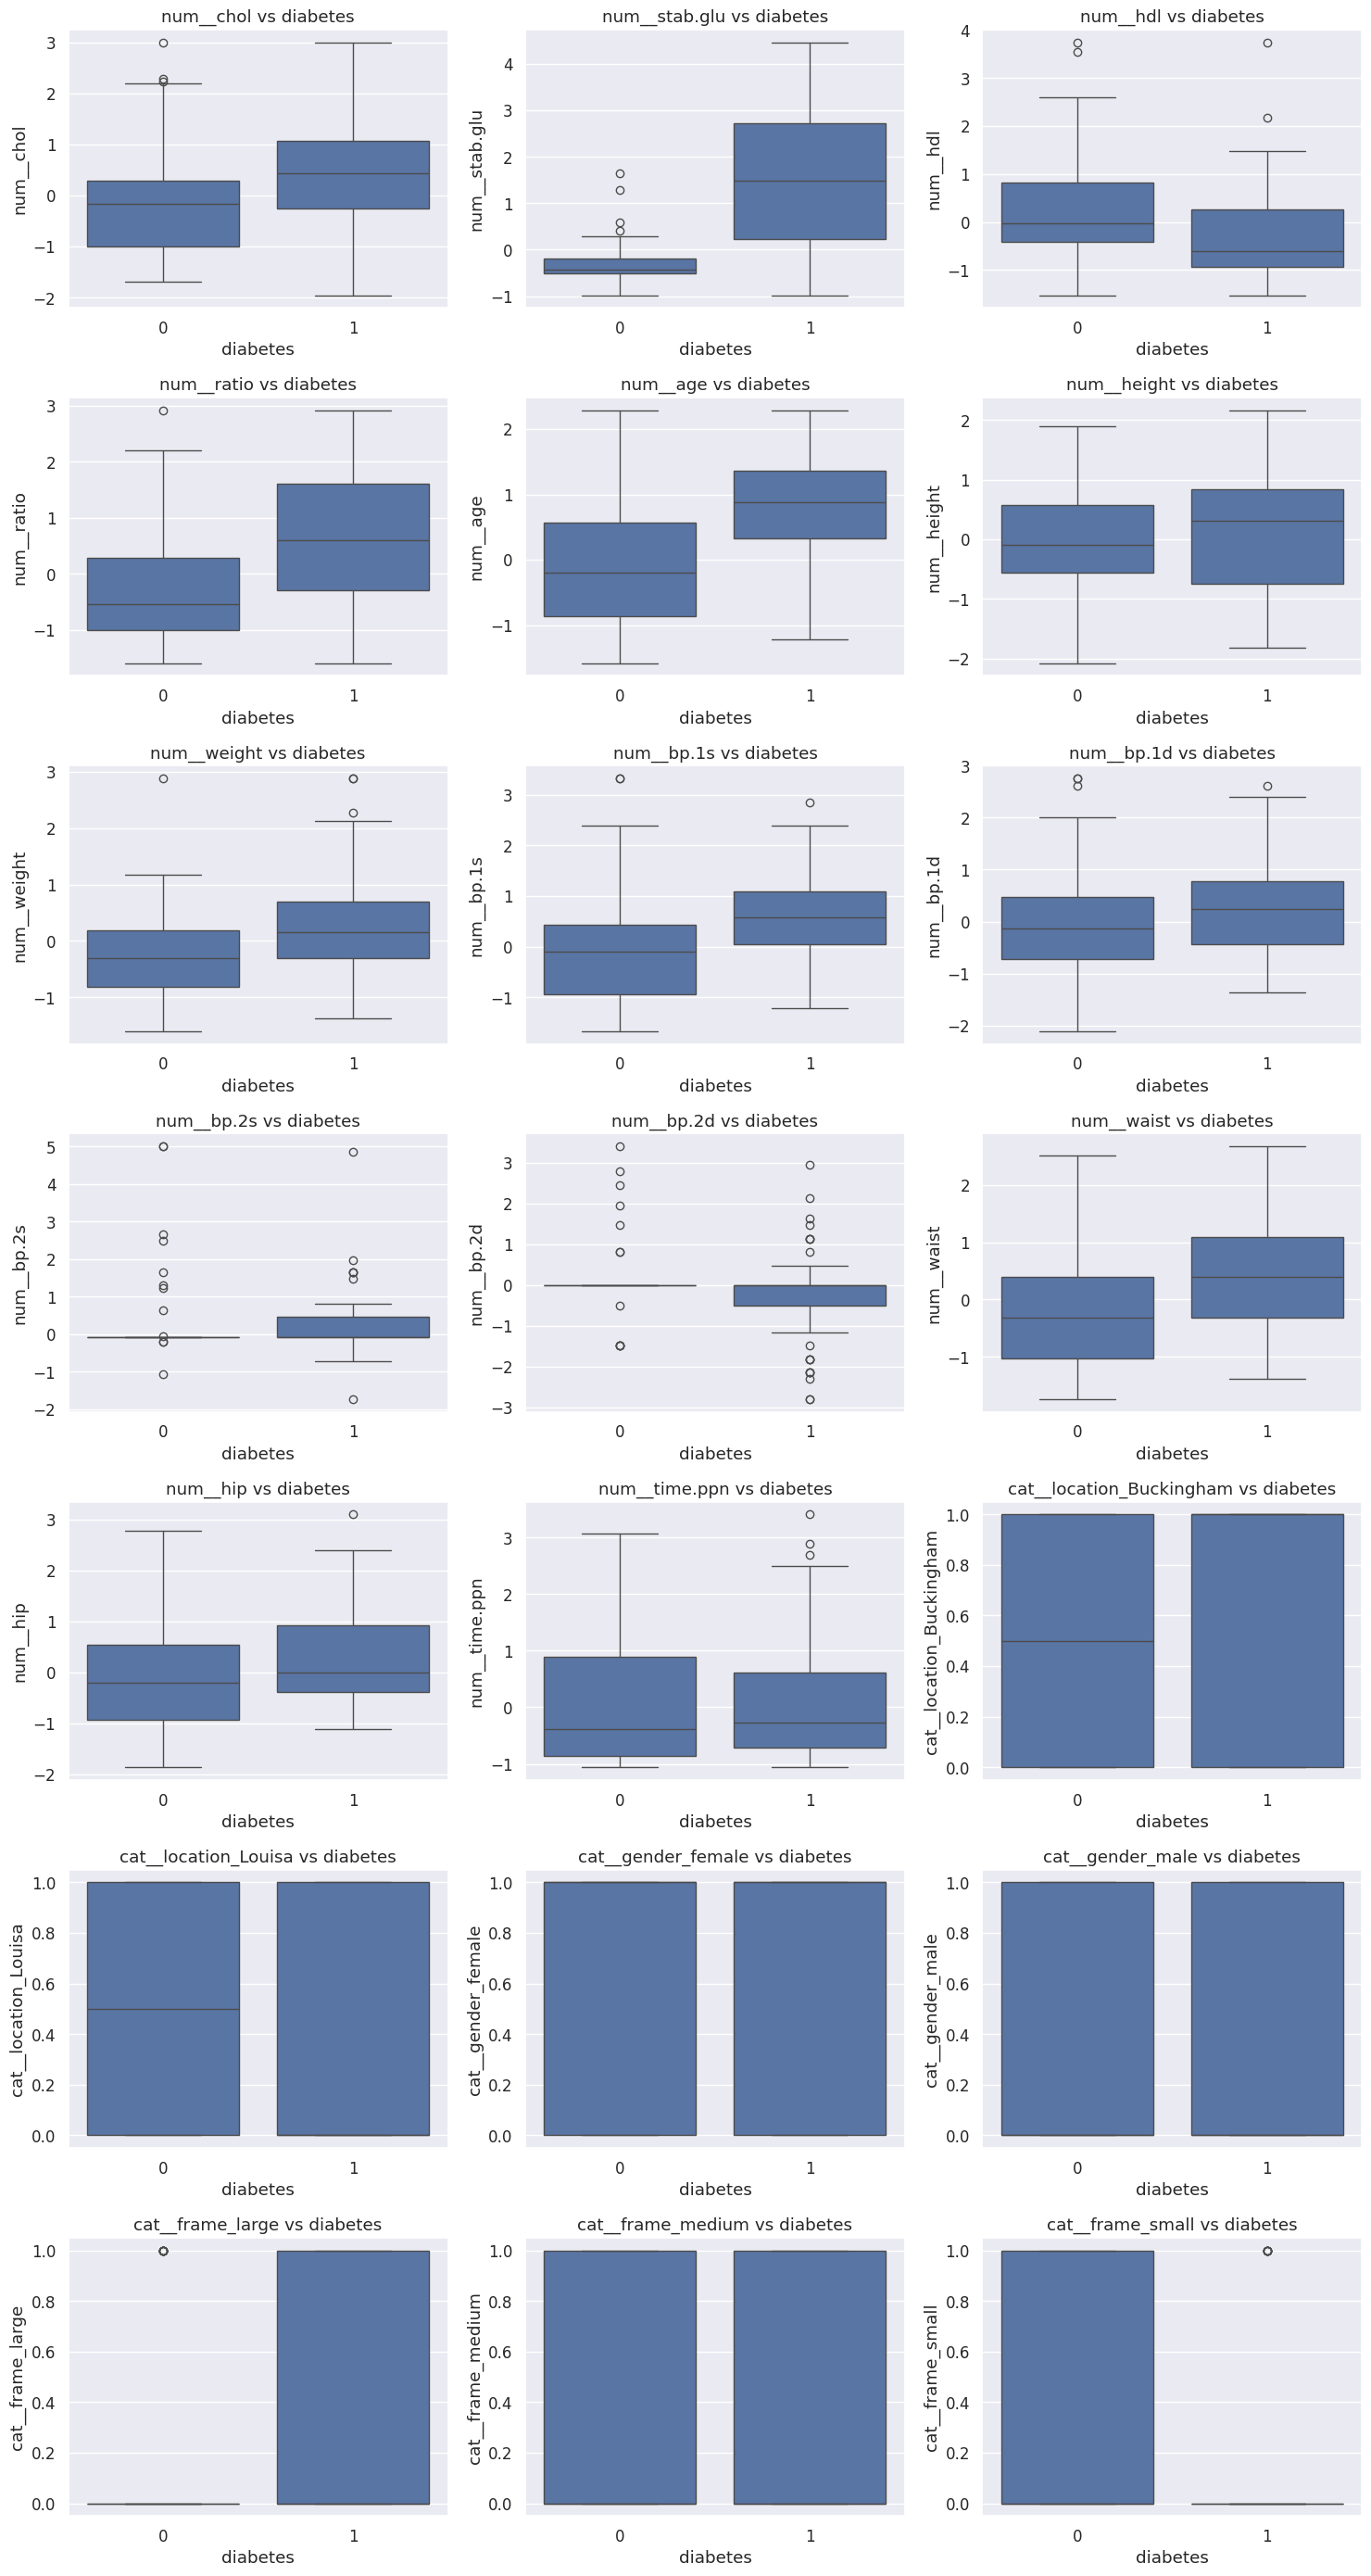

In [ ]:
proc_cols = preprocess_ct.get_feature_names_out()  # pobranie nazw cech po preprocessingu
X_train_df = pd.DataFrame(X_train_proc, columns=proc_cols)  # utworzenie DataFrame dla train

print(f"Załadowano {X_train_df.shape[0]} wierszy i {X_train_df.shape[1]} kolumn.\n")  # wyświetlenie rozmiaru
display(X_train_df.head())  # wyświetlenie pierwszych wierszy
X_train_df.info()  # informacja o DataFrame

print("\nStatystyki opisowe:")  # nagłówek statystyk
display(X_train_df.describe().T)  # statystyki opisowe cech

class_counts = pd.Series(y_train_bal).value_counts().rename(index={0: "Brak cukrzycy", 1: "Cukrzyca"})  # zliczenie klas
print("\nRozkład klas:")  # nagłówek rozkładu klas
display(class_counts)  # wyświetlenie rozkładu klas

fig, ax = plt.subplots()  # inicjalizacja wykresu
ax.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", startangle=90)  # wykres kołowy klas
ax.set_title("Bilans klas – diabetes")  # tytuł wykresu
plt.show()  # wyświetlenie wykresu

missing_summary = X_train_df.isna().sum().to_frame("Liczba braków")  # podsumowanie braków danych
print("\nBraki danych w kolumnach:")  # nagłówek braków
display(missing_summary)  # wyświetlenie braków

num_cols = [c for c in proc_cols if X_train_df[c].dtype != object]  # wybór cech numerycznych
n = len(num_cols)  # liczba cech numerycznych
cols = 3  # liczba kolumn wykresów
rows = (n + cols - 1) // cols  # liczba wierszy wykresów
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  # inicjalizacja siatki wykresów
axes = axes.flatten()  # spłaszczenie osi
for ax, col in zip(axes, num_cols):  # iteracja po cechach numerycznych
    sns.histplot(X_train_df[col], kde=True, ax=ax)  # histogram z estymacją gęstości
    ax.set_title(col)  # tytuł wykresu
for ax in axes[len(num_cols):]:  # wyłączenie pustych osi
    ax.axis("off")
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie histogramów

corr = X_train_df[num_cols].corr()  # macierz korelacji cech numerycznych
plt.figure(figsize=(10, 8))  # ustawienie rozmiaru
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)  # mapa cieplna korelacji
plt.title("Korelacje cech numerycznych (po preprocessingu)")  # tytuł wykresu
plt.show()  # wyświetlenie mapy cieplnej

sns.pairplot(  # analiza par cech
    pd.concat([X_train_df[num_cols], y_train_bal.reset_index(drop=True)], axis=1).sample(frac=0.5, random_state=42),
    hue="diabetes", vars=num_cols, diag_kind="hist", corner=True
)
plt.suptitle("Zależności cech (po preprocessingu – 50 %)", y=1.02)  # tytuł zbiorczy
plt.show()  # wyświetlenie pairplot

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  # inicjalizacja siatki wykresów pudełkowych
axes = axes.flatten()  # spłaszczenie osi
for ax, col in zip(axes, num_cols):  # iteracja po cechach
    sns.boxplot(x=y_train_bal, y=X_train_df[col], ax=ax)  # wykres pudełkowy względem etykiety
    ax.set_title(f"{col} vs diabetes")  # tytuł wykresu
for ax in axes[len(num_cols):]:  # wyłączenie pustych osi
    ax.axis("off")
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresów pudełkowych


## Hiperparametry + trening

In [ ]:
models_dir = Path(os.getcwd()) / "models"  # utworzenie katalogu na modele
models_dir.mkdir(parents=True, exist_ok=True)  # zapewnienie istnienia katalogu

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # konfiguracja walidacji krzyżowej
y_train = y_train_bal  # etykiety po balansowaniu

lr_simple = LogisticRegression(solver="liblinear", random_state=42)  # inicjalizacja prostego LR
search_simple = RandomizedSearchCV(
    lr_simple,
    {"C": loguniform(1e-3, 1e3)},  # zakres regularyzacji
    n_iter=20,  # liczba prób
    scoring="roc_auc",  # metryka
    cv=cv,  # walidacja
    random_state=42,
    n_jobs=-1,
)
search_simple.fit(X_train_proc, y_train)  # dopasowanie modelu
joblib.dump(search_simple.best_estimator_, models_dir / "logreg_simple.joblib")  # zapis najlepszego modelu

lr_mid = LogisticRegression(solver="saga", max_iter=10000, random_state=42)  # inicjalizacja średniego LR
param_mid = {
    "penalty": ["l1", "l2"],  # rodzaje kar
    "C": loguniform(1e-3, 1e3),  # zakres regularyzacji
    "class_weight": [None, "balanced"],  # wagi klas
}
search_mid = RandomizedSearchCV(
    lr_mid,
    param_mid,
    n_iter=40,  # liczba prób
    scoring="roc_auc",  # metryka
    cv=cv,  # walidacja
    random_state=42,
    n_jobs=-1,
)
search_mid.fit(X_train_proc, y_train)  # dopasowanie modelu
joblib.dump(search_mid.best_estimator_, models_dir / "logreg_mid.joblib")  # zapis najlepszego modelu

lr_adv = LogisticRegression(
    solver="saga", penalty="elasticnet", max_iter=10000, random_state=42
)  # inicjalizacja zaawansowanego LR
param_adv = {
    "C": loguniform(1e-3, 1e3),  # zakres regularyzacji
    "l1_ratio": uniform(0, 1),  # stosunek L1
    "class_weight": [None, "balanced"],  # wagi klas
}
search_adv = RandomizedSearchCV(
    lr_adv,
    param_adv,
    n_iter=40,  # liczba prób
    scoring="roc_auc",  # metryka
    cv=cv,  # walidacja
    random_state=42,
    n_jobs=-1,
)
search_adv.fit(X_train_proc, y_train)  # dopasowanie modelu
joblib.dump(search_adv.best_estimator_, models_dir / "logreg_advanced.joblib")  # zapis najlepszego modelu


['/content/models/logreg_advanced.joblib']

## Ewaluacja

CV_ROC_AUC  CV_Accuracy  CV_BalAcc  CV_Precision  CV_Recall  CV_F1  \
Model                                                                          
Simple         0.917        0.855      0.855         0.854      0.865  0.857   
Mid            0.911        0.865      0.865         0.880      0.845  0.862   
Advanced       0.910        0.846      0.848         0.936      0.753  0.829   

          Test_Accuracy  Test_BalAcc  Test_Precision  Test_Recall  Test_F1  \
Model                                                                        
Simple            0.833        0.869           0.500        0.923    0.649   
Mid               0.846        0.846           0.524        0.846    0.647   
Advanced          0.910        0.823           0.750        0.692    0.720   

          Test_ROC_AUC  Test_PR_AUC  Test_MCC  
Model                                          
Simple           0.923        0.707     0.596  
Mid              0.922        0.727     0.582  
Advanced         0.951        0.718     0.667

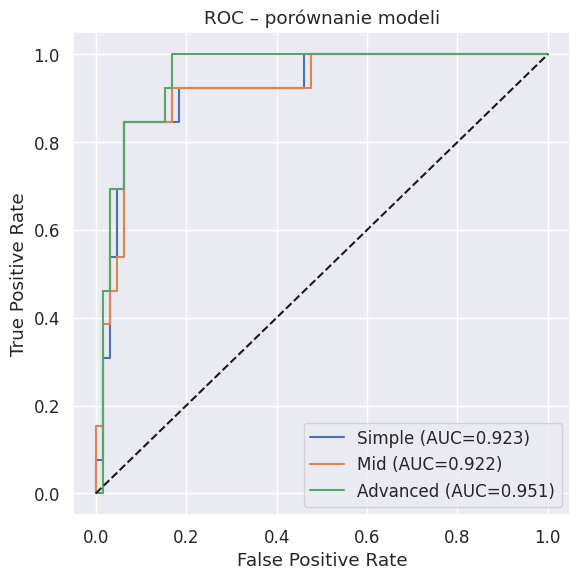

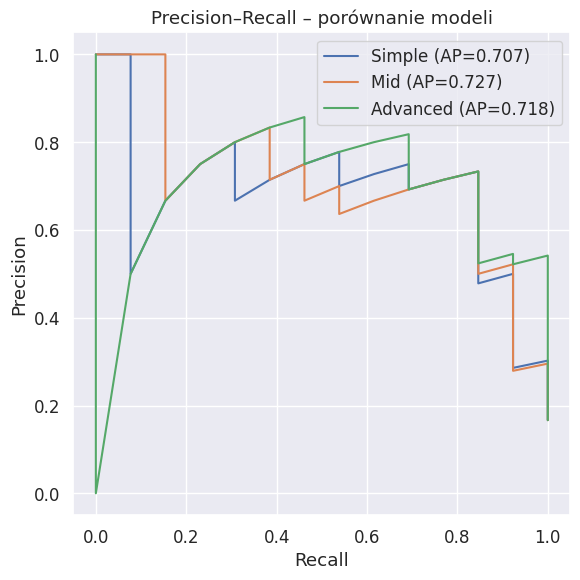

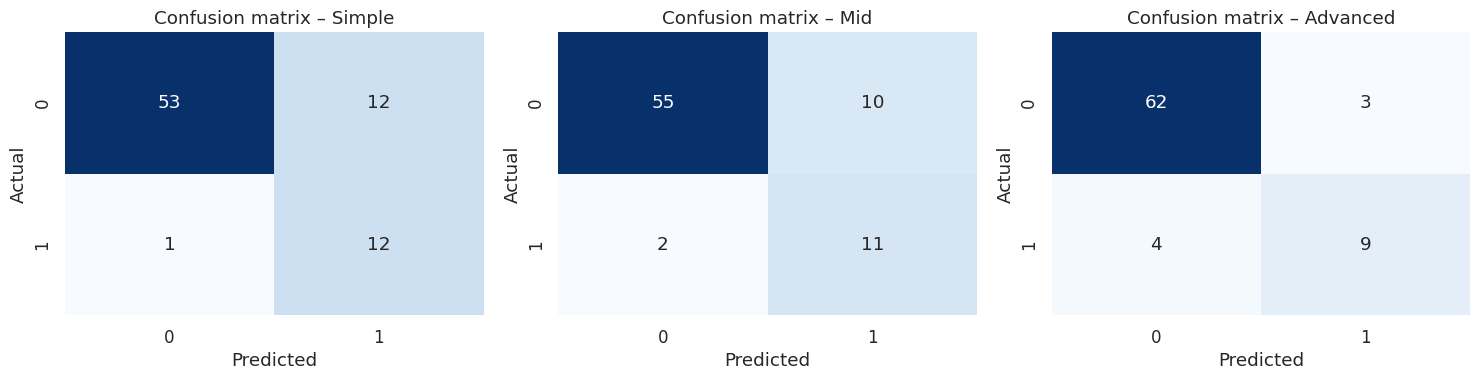

In [ ]:
models_dir = Path(os.getcwd()) / "models"  # katalog na modele
models = {
    "Simple":   joblib.load(models_dir / "logreg_simple.joblib"),  # ładowanie prostego modelu
    "Mid":      joblib.load(models_dir / "logreg_mid.joblib"),     # ładowanie średniego modelu
    "Advanced": joblib.load(models_dir / "logreg_advanced.joblib"),# ładowanie zaawansowanego modelu
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # konfiguracja StratifiedKFold
y_train = y_train_bal  # etykiety po balansowaniu

records, curves = [], {}  # inicjalizacja zbiorów wyników

for tag, model in models.items():  # iteracja po modelach
    cv_res = cross_validate(  # obliczenie metryk CV
        model,
        X_train_proc,
        y_train,
        cv=cv,
        scoring={  # słownik metryk
            "ROC_AUC": "roc_auc",
            "Accuracy": "accuracy",
            "BalAcc": "balanced_accuracy",
            "Precision": "precision",
            "Recall": "recall",
            "F1": "f1",
        },
        n_jobs=-1,
        return_train_score=False
    )

    y_proba = model.predict_proba(X_test_proc)[:, 1]  # prawdopodobieństwa
    y_pred  = model.predict(X_test_proc)  # predykcje klas

    records.append({  # agregacja wyników
        "Model":          tag,
        "CV_ROC_AUC":     cv_res["test_ROC_AUC"].mean(),  # średnia AUC CV
        "CV_Accuracy":    cv_res["test_Accuracy"].mean(),  # średnia Accuracy CV
        "CV_BalAcc":      cv_res["test_BalAcc"].mean(),    # średnia BalAcc CV
        "CV_Precision":   cv_res["test_Precision"].mean(), # średnia Precision CV
        "CV_Recall":      cv_res["test_Recall"].mean(),    # średnia Recall CV
        "CV_F1":          cv_res["test_F1"].mean(),        # średnia F1 CV
        "Test_Accuracy":  accuracy_score(y_test, y_pred),  # Accuracy testu
        "Test_BalAcc":    balanced_accuracy_score(y_test, y_pred),  # BalAcc testu
        "Test_Precision": precision_score(y_test, y_pred, zero_division=0),  # Precision testu
        "Test_Recall":    recall_score(y_test, y_pred, zero_division=0),     # Recall testu
        "Test_F1":        f1_score(y_test, y_pred, zero_division=0),         # F1 testu
        "Test_ROC_AUC":   roc_auc_score(y_test, y_proba),                   # AUC ROC testu
        "Test_PR_AUC":    average_precision_score(y_test, y_proba),         # AUC Precision–Recall
        "Test_MCC":       matthews_corrcoef(y_test, y_pred),                 # współczynnik MCC
    })

    fpr, tpr, _   = roc_curve(y_test, y_proba)  # krzywa ROC
    prec, rec_, _ = precision_recall_curve(y_test, y_proba)  # krzywa Precision–Recall
    curves[tag]   = {"fpr": fpr, "tpr": tpr, "prec": prec, "rec": rec_}  # zapis krzywych

metrics_df = pd.DataFrame(records).set_index("Model").round(3)  # DataFrame metryk
display(metrics_df)  # wyświetlenie tabeli

plt.figure(figsize=(6, 6))  # wykres ROC
for tag, pts in curves.items():  # iteracja po krzywych ROC
    plt.plot(pts["fpr"], pts["tpr"],
             label=f"{tag} (AUC={metrics_df.loc[tag,'Test_ROC_AUC']:.3f})")  # wykres linii
plt.plot([0, 1], [0, 1], "k--")  # linia losowa
plt.xlabel("False Positive Rate")  # etykieta osi X
plt.ylabel("True Positive Rate")  # etykieta osi Y
plt.title("ROC – porównanie modeli")  # tytuł wykresu
plt.legend()  # legenda
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresu

plt.figure(figsize=(6, 6))  # wykres Precision–Recall
for tag, pts in curves.items():  # iteracja po krzywych Precision–Recall
    plt.plot(pts["rec"], pts["prec"],
             label=f"{tag} (AP={metrics_df.loc[tag,'Test_PR_AUC']:.3f})")  # wykres linii
plt.xlabel("Recall")  # etykieta osi X
plt.ylabel("Precision")  # etykieta osi Y
plt.title("Precision–Recall – porównanie modeli")  # tytuł wykresu
plt.legend()  # legenda
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresu

fig, axes = plt.subplots(1, len(models), figsize=(5*len(models), 4))  # siatka macierzy pomyłek
for ax, (tag, model) in zip(axes, models.items()):  # iteracja po modelach
    cm = confusion_matrix(y_test, model.predict(X_test_proc))  # macierz pomyłek
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)  # wykres macierzy
    ax.set_title(f"Confusion matrix – {tag}")  # tytuł wykresu
    ax.set_xlabel("Predicted")  # etykieta osi X
    ax.set_ylabel("Actual")  # etykieta osi Y
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresów
